/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/0g/mml2lfgj70x82srpbgxfwwsc0000gn/T/ipykernel_17630/3056731761.py:43: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_coeffs,_,_,_=np.linalg.lstsq(A,y_i)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


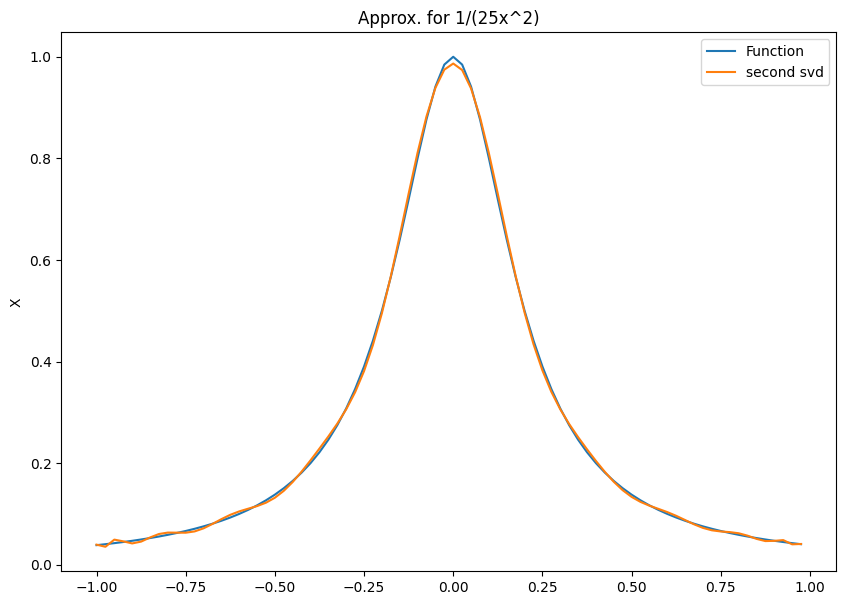

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

m=np.array([10,20])
n=np.array([10,80])

def my_func(x):
    return 1/(1+25*x**2)

coeffs = []
coefficients = []
coeffs_svd=[]

for i in range(len(n)):
    curr_n, curr_m = n[i], m[i]
    x_i = np.arange(-1,1,2/curr_n)
    y_i = my_func(x_i)

    local_coefficients = np.polyfit(x_i,y_i,curr_m)
    coefficients.append(local_coefficients)
    
    A=np.zeros([curr_n,curr_m+1])
    powers = np.arange(0,curr_m+1,1)
    
    for i in range(len(x_i)):
        curr_x = np.array([x_i[i]]*(curr_m+1))
        curr_x**=powers
        A[i]=curr_x

                 
    U,S,V = np.linalg.svd(A)
    S=1/S
    S=np.diag(S)
    S_empty = np.zeros([curr_m+1,curr_n])
    S_empty[:S.shape[0],:S.shape[0]]=S
    S=S_empty

    V_times_S_inv = np.matmul(V,S)
    U_T_time_Y = np.matmul(np.transpose(U),y_i)
    local_coeffs = np.matmul(V_times_S_inv,U_T_time_Y)

    x_coeffs,_,_,_=np.linalg.lstsq(A,y_i)
    coeffs.append(local_coeffs)
    coeffs_svd.append(x_coeffs)

x_i = np.arange(-1,1,2/80)
y_i = my_func(x_i)
    

def polynom(coeffs,x):
    ans = 0
    for i in range(len(coeffs)):
        ans += coeffs[i]*x**i
    return ans

fitted_data_ten = np.polyval(coefficients[0],x_i)
fitted_data_twenty = np.polyval(coefficients[1],x_i)
pol_ten_order = polynom(coeffs[0],x_i)
pol_twenty_order = polynom(coeffs[1],x_i)
pol_least_sqaures_ten = polynom(coeffs_svd[0],x_i)
pol_least_sqaures_twenty = polynom(coeffs_svd[1],x_i)

fig,axs = plt.subplots(nrows=1,ncols=1,figsize=((10,7)))
axs.plot(x_i,y_i,label="Function")
axs.plot(x_i,pol_least_sqaures_twenty,label = 'second svd')

# axs.plot(x_i,fitted_data_ten,label="Tenth order fitted")
# axs.plot(x_i,fitted_data_twenty,label="Twenty order fitted")
# axs.plot(x_i,pol_least_sqaures_twenty,label="Least_squares 20")
axs.set_title("Approx. for 1/(25x^2)")
axs.set_ylabel("Y")
axs.set_ylabel("X")
axs.legend()

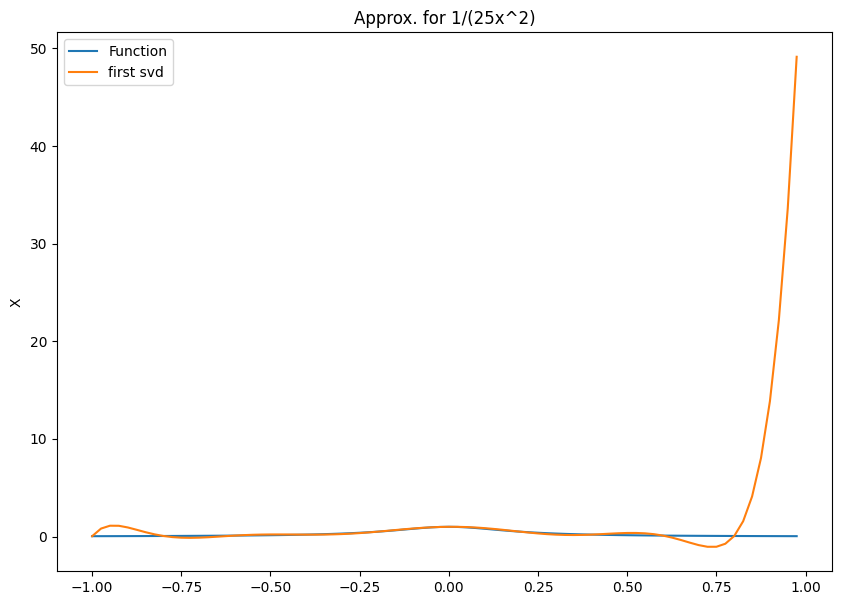

In [64]:
fig,axs = plt.subplots(nrows=1,ncols=1,figsize=((10,7)))
axs.plot(x_i,y_i,label="Function")
axs.plot(x_i,pol_least_sqaures_ten,label = 'first svd')

# axs.plot(x_i,fitted_data_ten,label="Tenth order fitted")
# axs.plot(x_i,fitted_data_twenty,label="Twenty order fitted")
# axs.plot(x_i,pol_least_sqaures_twenty,label="Least_squares 20")
axs.set_title("Approx. for 1/(25x^2)")
axs.set_ylabel("Y")
axs.set_ylabel("X")
axs.legend()